In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Neural net moduel
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
df.dropna(axis=0, inplace=True)

In [6]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [7]:
df['ocean_proximity'] = df['ocean_proximity'].map({"<1H OCEAN":0,"INLAND":1,"NEAR OCEAN":2,"NEAR BAY":3,"ISLAND":4})

In [8]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


**Train test split**

In [9]:
y = df['median_house_value']
x = df.drop('median_house_value', axis=1)
print(x.shape)
print(y.shape)

(20433, 9)
(20433,)


In [10]:
x = np.array(x)
y = np.array(y)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16346, 9)
(4087, 9)
(16346,)
(4087,)


**SCALING**

In [12]:
# Use MinMax scaler
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.transform(x_test)

In [13]:
print(x_train)
print(x_test)

[[0.62549801 0.15515409 0.80392157 ... 0.05690789 0.14690142 0.        ]
 [0.60956175 0.1498406  0.50980392 ... 0.02713816 0.03116509 0.        ]
 [0.71713147 0.02337938 0.76470588 ... 0.07467105 0.14840485 0.5       ]
 ...
 [0.5059761  0.40170032 0.15686275 ... 0.10296053 0.29464421 0.25      ]
 [0.60159363 0.17534538 0.23529412 ... 0.17697368 0.10948814 0.        ]
 [0.71912351 0.02019129 1.         ... 0.03503289 0.34165736 0.5       ]]
[[0.562749   0.18597237 0.47058824 ... 0.04375    0.39196011 0.        ]
 [0.58366534 0.18597237 0.49019608 ... 0.09523026 0.60601923 0.        ]
 [0.79681275 0.02125399 0.29411765 ... 0.06003289 0.08370919 0.25      ]
 ...
 [0.60657371 0.15621679 0.70588235 ... 0.09802632 0.09706763 0.        ]
 [0.65537849 0.10733262 0.52941176 ... 0.04473684 0.43352505 0.        ]
 [0.1812749  0.58129649 0.50980392 ... 0.08009868 0.3433194  0.75      ]]


**BUILDING ANN MODEL**

In [14]:
model = Sequential([
    #input layer
    Dense(1000, input_shape=(x_train.shape[1],), activation='relu'),
    Dropout(0.2),
    #two hidden layers
    Dense(500, activation='relu'),
    Dropout(0.2),
    Dense(250, activation='relu'),
    #output layer
    Dense(1,activation='linear') # here 1 shows countinuous value(regression)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              10000     
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 250)               125250    
                                                                 
 dense_3 (Dense)             (None, 1)                 251       
                                                                 
Total params: 636001 (2.43 MB)
Trainable params: 636001 

In [15]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
es = EarlyStopping(monitor='val_loss',mode='min',patience=50, restore_best_weights=True)

In [16]:
history = model.fit(x_train, y_train, validation_data= (x_test, y_test), callbacks=[es], epochs=10, batch_size=50, verbose=1)

Epoch 1/10
327/327 [==============================] - 12s 32ms/step - loss: 23622129664.0000 - mae: 117945.2188 - val_loss: 11043580928.0000 - val_mae: 84077.0703
Epoch 2/10
327/327 [==============================] - 9s 28ms/step - loss: 9104190464.0000 - mae: 75595.7734 - val_loss: 7295655424.0000 - val_mae: 66374.1797
Epoch 3/10
327/327 [==============================] - 6s 18ms/step - loss: 6265341952.0000 - mae: 59481.5859 - val_loss: 5963757568.0000 - val_mae: 56446.9609
Epoch 4/10
327/327 [==============================] - 5s 15ms/step - loss: 5838337024.0000 - mae: 56063.0000 - val_loss: 5825346048.0000 - val_mae: 54870.0859
Epoch 5/10
327/327 [==============================] - 6s 19ms/step - loss: 5647340544.0000 - mae: 55080.7852 - val_loss: 5555905024.0000 - val_mae: 54672.8438
Epoch 6/10
327/327 [==============================] - 5s 15ms/step - loss: 5465396224.0000 - mae: 53879.9375 - val_loss: 5460749312.0000 - val_mae: 52284.1406
Epoch 7/10
327/327 [======================

**METRICS AND SCORE**

In [17]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_squared_log_error

y_pred = model.predict(x_test)
print("mae :", mean_absolute_error(y_test,y_pred))
print("mse :", mean_squared_error(y_test,y_pred))
print("mae :", mean_squared_log_error(y_test,y_pred))
print("score :", r2_score(y_test,y_pred))

128/128 [==============================] - 2s 15ms/step
mae : 48503.14518308815
mse : 4759882787.701286
mae : 0.10815643191252378
score : 0.6514985928484085


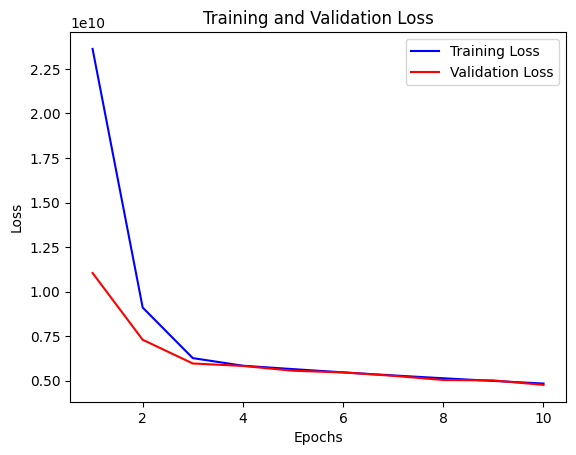

In [19]:
# Get the training and validation loss from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)
# Plot the training and validation loss
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')

# Label the plot
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()

128/128 [==============================] - 0s 3ms/step


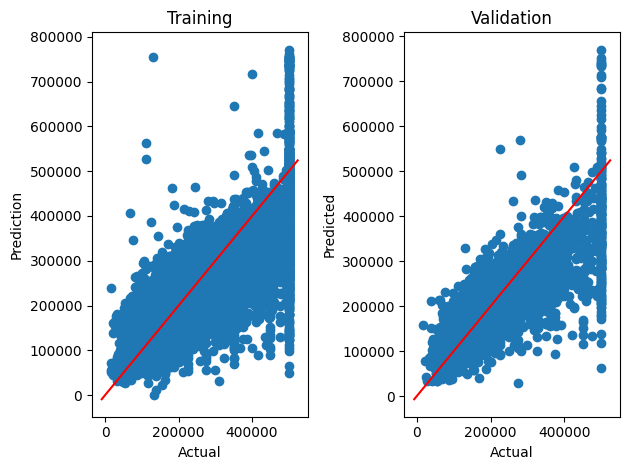

In [20]:
# Specify the dimensions
fig, axes = plt.subplots(1,2)

# This makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(x_train))
axes[0].set_xlabel('Actual', fontsize=10)
axes[0].set_ylabel('Prediction', fontsize=10)
axes[0].set_title('Training')

# Add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')

# Validation Results
axes[1].scatter(x=y_test, y=model.predict(x_test))
axes[1].set_xlabel('Actual', fontsize=10)
axes[1].set_ylabel('Predicted', fontsize=10)
axes[1].set_title('Validation')

# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# Tight layout
fig.tight_layout()
plt.show()

**PREDICTIVE SYSTEM**


In [21]:
def pred(longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity):
    features = np.array([longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity])
    features_scaled = min_max_scaler.fit_transform([features])
    results = model.predict(features_scaled).reshape(1,-1)
    return results[0]